<a href="https://colab.research.google.com/github/brettmorrisonAO5ANNEX/robust-regression-test-script/blob/main/RobustRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

regression functions:

In [8]:
def create_design_matrix(xvals, n):
    return np.column_stack([xvals**i for i in range(n + 1)])

def polynomial_regression(xvals, yvals, n, delta, lossFunction):
    design_matrix = create_design_matrix(xvals, n)

    def loss_function(parameters):
        predictions = np.dot(design_matrix, parameters)
        residuals = predictions - yvals
        return np.sum(lossFunction(residuals, delta))

    initial_guess = np.zeros(n + 1)
    result = minimize(loss_function, initial_guess)
    coefficients = result.x
    return coefficients

loss functions:

In [14]:
def huber_loss(residuals, delta):
    return np.where(np.abs(residuals) <= delta,
                    0.5 * residuals**2,
                    delta * (np.abs(residuals) - 0.5 * delta))

def ols_loss(residuals, delta):
    return np.sum(0.5 * residuals**2)

plotting functions:

In [15]:
def plot_data_and_model(xvals, yvals, coefficients_1, coefficients_2):
    plt.scatter(xvals, yvals, label='Original data')

    # Generate x values for plotting the fitted model
    x_fit = np.linspace(min(xvals), max(xvals), 100)

    design_matrix_fit_1 = create_design_matrix(x_fit, len(coefficients_1) - 1)
    y_fit_1 = np.dot(design_matrix_fit_1, coefficients_1)
    plt.plot(x_fit, y_fit_1, color='red', label='robust model')

    design_matrix_fit_2 = create_design_matrix(x_fit, len(coefficients_2) - 1)
    y_fit_2 = np.dot(design_matrix_fit_2, coefficients_2)
    plt.plot(x_fit, y_fit_2, color='green', label='ols model')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

example:

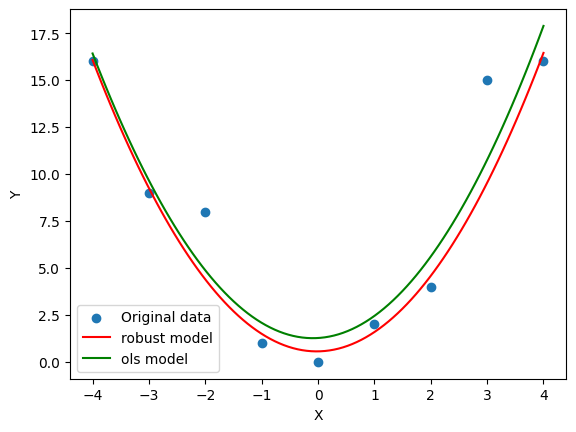

In [20]:
xvals = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
yvals = np.array([16, 9, 8, 1, 0, 2, 4, 15, 16])
degree = 2
delta = 1.0
coefficients_1 = polynomial_regression(xvals, yvals, degree, delta, huber_loss)
coefficients_2 = polynomial_regression(xvals, yvals, degree, delta, ols_loss)

plot_data_and_model(xvals, yvals, coefficients_1, coefficients_2)